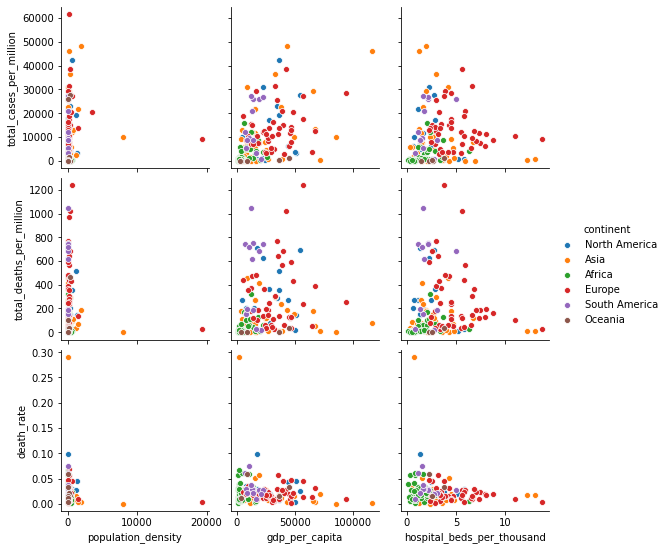

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns

# Load the data (create the DataFrame)
fields = ['iso_code','continent','location','date','total_cases','total_deaths','total_cases_per_million',
          'total_deaths_per_million','population_density','gdp_per_capita','hospital_beds_per_thousand']

# Add also death_rate column
df = pd.read_csv('/home/left/Desktop/dataMining/set1/owid-covid-data.csv', usecols = fields)
df['death_rate'] = df['total_deaths']/df['total_cases']

# Transform population density and gdp per capita these variables normally distributed
#df['log_gdp_per_capita'] = np.log10(df['gdp_per_capita'])
#df['log_population_density'] = np.log10(df['population_density'])

#df = df.drop(columns = ['gdp_per_capita','population_density'])



# Change DataFrame to the date we want
df = df.loc[df.date == '2020-11-01']
#df = df.drop([57264, 57588])

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])




In [87]:
from scipy.stats import pearsonr

values = []
pair1 = df.dropna(subset = ['population_density', 'death_rate'], how ='any')
values.append(pearsonr(pair1.population_density, pair1.death_rate))

pair2 = df.dropna(subset = ['population_density', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair2.population_density, pair2.total_deaths_per_million))

pair3 = df.dropna(subset = ['population_density', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair3.population_density, pair3.total_cases_per_million))

pair4 = df.dropna(subset = ['gdp_per_capita', 'death_rate'], how ='any')
values.append(pearsonr(pair4.gdp_per_capita, pair4.death_rate))

pair5 = df.dropna(subset = ['gdp_per_capita', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair5.gdp_per_capita, pair5.total_deaths_per_million))

pair6 = df.dropna(subset = ['gdp_per_capita', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair6.gdp_per_capita, pair6.total_cases_per_million))

pair7 = df.dropna(subset = ['hospital_beds_per_thousand', 'death_rate'], how ='any')
values.append(pearsonr(pair7.hospital_beds_per_thousand, pair7.death_rate))

pair8 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair8.hospital_beds_per_thousand, pair8.total_deaths_per_million))

pair9 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair9.hospital_beds_per_thousand, pair9.total_cases_per_million))
values

[(-0.10000651310915307, 0.17798916351083893),
 (-0.058397547975040334, 0.4323101132646394),
 (0.062125559569446515, 0.3809565063080892),
 (-0.14965474185667882, 0.050742345928191934),
 (0.2541340058740727, 0.000796241313640362),
 (0.5159806204623202, 5.618893933758231e-14),
 (-0.184789549051784, 0.022213004275193855),
 (0.05864998409761146, 0.4714442835248957),
 (0.1423786439787726, 0.06643455866616964)]

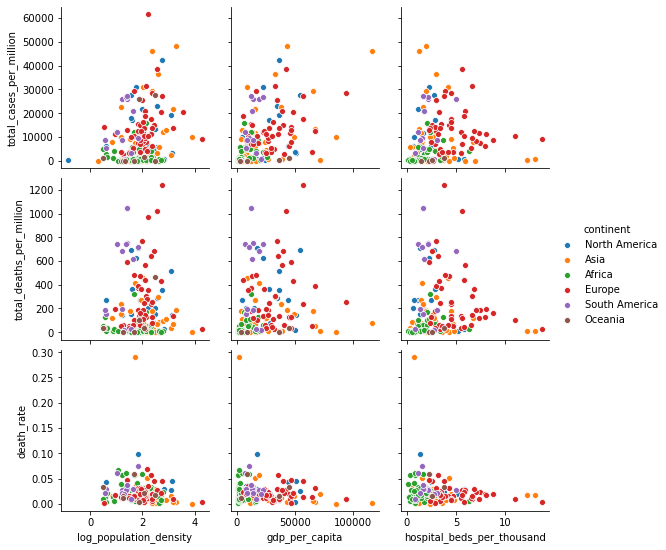

In [88]:
# Take the log of population_density
df['log_population_density'] = np.log10(df['population_density'])
df = df.drop(columns = ['population_density'])

# Change DataFrame to the date we want
df = df.loc[df.date == '2020-11-01']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])

In [89]:
# New Pearson Coefficients and p_values with log_population_density
values = []
pair1 = df.dropna(subset = ['log_population_density', 'death_rate'], how ='any')
values.append(pearsonr(pair1.log_population_density, pair1.death_rate))

pair2 = df.dropna(subset = ['log_population_density', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair2.log_population_density, pair2.total_deaths_per_million))

pair3 = df.dropna(subset = ['log_population_density', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair3.log_population_density, pair3.total_cases_per_million))

pair4 = df.dropna(subset = ['gdp_per_capita', 'death_rate'], how ='any')
values.append(pearsonr(pair4.gdp_per_capita, pair4.death_rate))

pair5 = df.dropna(subset = ['gdp_per_capita', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair5.gdp_per_capita, pair5.total_deaths_per_million))

pair6 = df.dropna(subset = ['gdp_per_capita', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair6.gdp_per_capita, pair6.total_cases_per_million))

pair7 = df.dropna(subset = ['hospital_beds_per_thousand', 'death_rate'], how ='any')
values.append(pearsonr(pair7.hospital_beds_per_thousand, pair7.death_rate))

pair8 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair8.hospital_beds_per_thousand, pair8.total_deaths_per_million))

pair9 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair9.hospital_beds_per_thousand, pair9.total_cases_per_million))
values

[(-0.13084081983701423, 0.0774880033775111),
 (0.01163448498135465, 0.8757845493034186),
 (0.19801683582445173, 0.0048350792795423285),
 (-0.14965474185667882, 0.050742345928191934),
 (0.2541340058740727, 0.000796241313640362),
 (0.5159806204623202, 5.618893933758231e-14),
 (-0.184789549051784, 0.022213004275193855),
 (0.05864998409761146, 0.4714442835248957),
 (0.1423786439787726, 0.06643455866616964)]

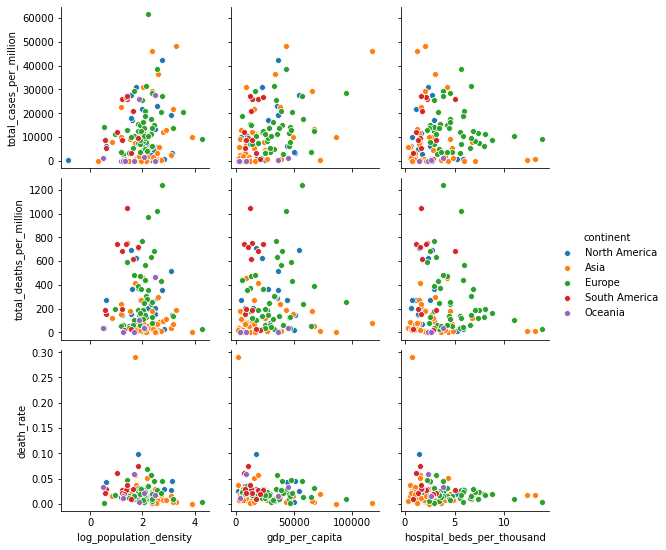

In [14]:
# Without African continent
df = df.loc[df.continent != 'Africa']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])

In [15]:
# New Pearson Coefficients and p_values without African continent
values = []
pair1 = df.dropna(subset = ['log_population_density', 'death_rate'], how ='any')
values.append(pearsonr(pair1.log_population_density, pair1.death_rate))

pair2 = df.dropna(subset = ['log_population_density', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair2.log_population_density, pair2.total_deaths_per_million))

pair3 = df.dropna(subset = ['log_population_density', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair3.log_population_density, pair3.total_cases_per_million))

pair4 = df.dropna(subset = ['gdp_per_capita', 'death_rate'], how ='any')
values.append(pearsonr(pair4.gdp_per_capita, pair4.death_rate))

pair5 = df.dropna(subset = ['gdp_per_capita', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair5.gdp_per_capita, pair5.total_deaths_per_million))

pair6 = df.dropna(subset = ['gdp_per_capita', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair6.gdp_per_capita, pair6.total_cases_per_million))

pair7 = df.dropna(subset = ['hospital_beds_per_thousand', 'death_rate'], how ='any')
values.append(pearsonr(pair7.hospital_beds_per_thousand, pair7.death_rate))

pair8 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair8.hospital_beds_per_thousand, pair8.total_deaths_per_million))

pair9 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair9.hospital_beds_per_thousand, pair9.total_cases_per_million))
values

[(-0.14181218461421508, 0.10480124422275376),
 (-0.0829348431486697, 0.34444653296960864),
 (0.1728580247964166, 0.035647992152048044),
 (-0.1922099702749785, 0.03545103866337192),
 (0.07905175694387796, 0.39075512386983424),
 (0.417222039331797, 6.46409178491921e-07),
 (-0.20740573139650811, 0.026140045296353002),
 (-0.08403396676290859, 0.37191072926197305),
 (0.00961541337152054, 0.9145579011413235)]

12133.959383060661
8403.213739130437


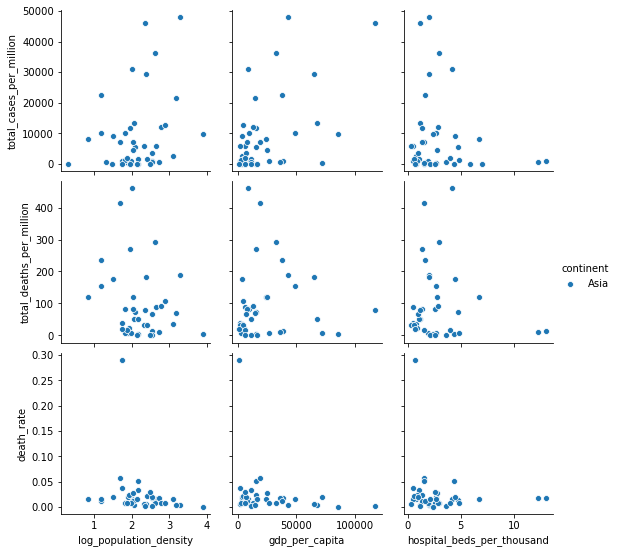

In [16]:
# Only European countries
df = df.loc[df.continent == 'Asia']
std= df.total_cases_per_million.std()
mean=df.total_cases_per_million.mean()

print(std)
print(mean)
# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])

In [17]:
# New Pearson Coefficients and p_values for European countries only
values = []

pair1 = df.dropna(subset = ['log_population_density', 'death_rate'], how ='any')
values.append(pearsonr(pair1.log_population_density, pair1.death_rate))

pair2 = df.dropna(subset = ['log_population_density', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair2.log_population_density, pair2.total_deaths_per_million))

pair3 = df.dropna(subset = ['log_population_density', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair3.log_population_density, pair3.total_cases_per_million))

pair4 = df.dropna(subset = ['gdp_per_capita', 'death_rate'], how ='any')
values.append(pearsonr(pair4.gdp_per_capita, pair4.death_rate))

pair5 = df.dropna(subset = ['gdp_per_capita', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair5.gdp_per_capita, pair5.total_deaths_per_million))

pair6 = df.dropna(subset = ['gdp_per_capita', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair6.gdp_per_capita, pair6.total_cases_per_million))

pair7 = df.dropna(subset = ['hospital_beds_per_thousand', 'death_rate'], how ='any')
values.append(pearsonr(pair7.hospital_beds_per_thousand, pair7.death_rate))

pair8 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair8.hospital_beds_per_thousand, pair8.total_deaths_per_million))

pair9 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair9.hospital_beds_per_thousand, pair9.total_cases_per_million))
values

[(-0.2135089407845518, 0.19186213033758143),
 (-0.21734863790686182, 0.1838038423647101),
 (0.2752928088373876, 0.07050669365061467),
 (-0.21985715544871037, 0.17867083602747608),
 (0.020096191431498486, 0.9033507846477778),
 (0.5282018076481059, 0.00022853614119816874),
 (-0.13723456085953942, 0.4112995856131496),
 (-0.08272049374059293, 0.62149196413086),
 (-0.13230896533115083, 0.3976814354746394)]

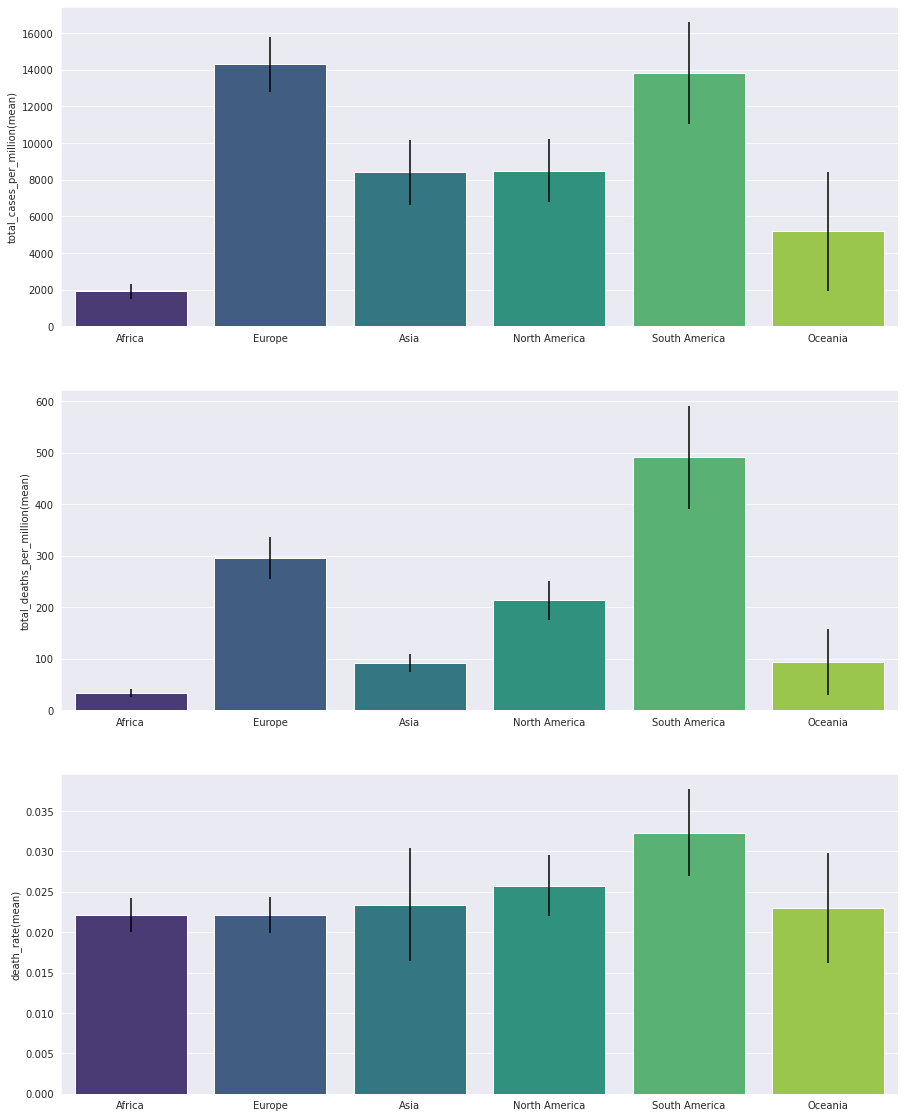

In [5]:
means_per_continent = []
continents = ['Africa', 'Europe', 'Asia', 'North America', 'South America', 'Oceania']
error_per_continent = [] # for error bar?

# Find means for the columns we need
for i in continents:
    df_per_continent = df.loc[df.continent == i]
    means_per_continent.append([df_per_continent['total_cases_per_million'].mean(),
                                df_per_continent['total_deaths_per_million'].mean(),
                                df_per_continent['death_rate'].mean()])
    error_per_continent.append([df_per_continent['total_cases_per_million'].sem(),
                                df_per_continent['total_deaths_per_million'].sem(),
                                df_per_continent['death_rate'].sem()])

# Create the DataFrame
df2 = pd.DataFrame(means_per_continent,
                   index =continents,
                   columns = ['total_cases_per_million(mean)', 'total_deaths_per_million(mean)', 'death_rate(mean)'])

# Display the bar plots with error bars
sns.set_style("darkgrid")
fig = plt.figure(figsize=(15,20))
for i in range(3):
    sem_error = [x[i] for x in error_per_continent]
    plt.subplot(3,1,i+1)
    if i==0: g =sns.barplot(x= continents, y= 'total_cases_per_million(mean)', data= df2, yerr = sem_error, palette='viridis')
    elif i==1: g =sns.barplot(x= continents, y= 'total_deaths_per_million(mean)', data= df2, yerr = sem_error, palette='viridis')
    else: g =sns.barplot(x= continents, y= 'death_rate(mean)', data= df2, yerr= sem_error, palette='viridis')


In [114]:
from scipy.stats import ttest_ind

# Display t-tests' results
print(ttest_ind(df2['total_cases_per_million(mean)'].values, df2['total_deaths_per_million(mean)'].values))
print(ttest_ind(df2['total_cases_per_million(mean)'].values, df2['death_rate(mean)'].values))
print(ttest_ind(df2['total_deaths_per_million(mean)'].values, df2['death_rate(mean)'].values))

Ttest_indResult(statistic=4.313356141077026, pvalue=0.001528993551753218)
Ttest_indResult(statistic=4.419311883226431, pvalue=0.0012954986753324648)
Ttest_indResult(statistic=2.9149543737505814, pvalue=0.01543323297628191)


In [119]:
#LATER TO SEE NORMALITY OF OUR DATA
from scipy import stats
stats.shapiro(df['total_cases'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
# Load the data (create the DataFrame)
fields = ['iso_code','continent','location','date','total_cases','total_deaths','new_cases',
          'new_deaths']

# Add also death_rate column
df = pd.read_csv('/home/left/Desktop/dataMining/set1/owid-covid-data.csv', usecols = fields)
df['death_rate'] = df['total_deaths']/df['total_cases']

df = df.loc[df.location != 'International']
df = df.loc[df.location != 'World']
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.sort_values(by = ['date', 'iso_code'])


In [3]:
from scipy import stats
cases_monthly = []
deaths_monthly = []
ratio_monthly = []
np.seterr(divide='ignore')
error = []

for i in range(1,12):
    data = df.loc[df.month == i]
    #data = data.loc[df.location == 'Yemen']
    #data = data.loc[df.location == 'Italy']

    #data = data.sort_values(by = ['date', 'iso_code'])
    #print(data)
    
    days = data.day.values

    cases_today = data.new_cases.mean()
    deaths_today = data.new_deaths.mean()    
    ratio_today = data.new_deaths.values/data.new_cases.values

    cases_monthly.append(cases_today)
    deaths_monthly.append(deaths_today)
    ratio_monthly.append((np.nanmean(ratio_today[np.isfinite(ratio_today)])))
    error.append([data.new_cases.sem(),
                  data.new_deaths.sem(),
                  stats.sem(ratio_today, nan_policy='omit')])


<ipython-input-3-ee90ea32c825>:20: RuntimeWarning: invalid value encountered in true_divide
  ratio_today = data.new_deaths.values/data.new_cases.values


In [4]:
from datetime import datetime
new_df = pd.DataFrame({'new_cases_monthly':cases_monthly, 'new_deaths_monthly':deaths_monthly, 'ratio_monthly':ratio_monthly})
new_df.index+=1
months = np.array([])

for x in new_df.index:
    datetime_object = datetime.strptime(str(x), "%m")
    full_month_name = datetime_object.strftime("%B")
    months = np.append(months,full_month_name)
    
new_df = new_df.set_index(months)
new_df.index.name = 'month'


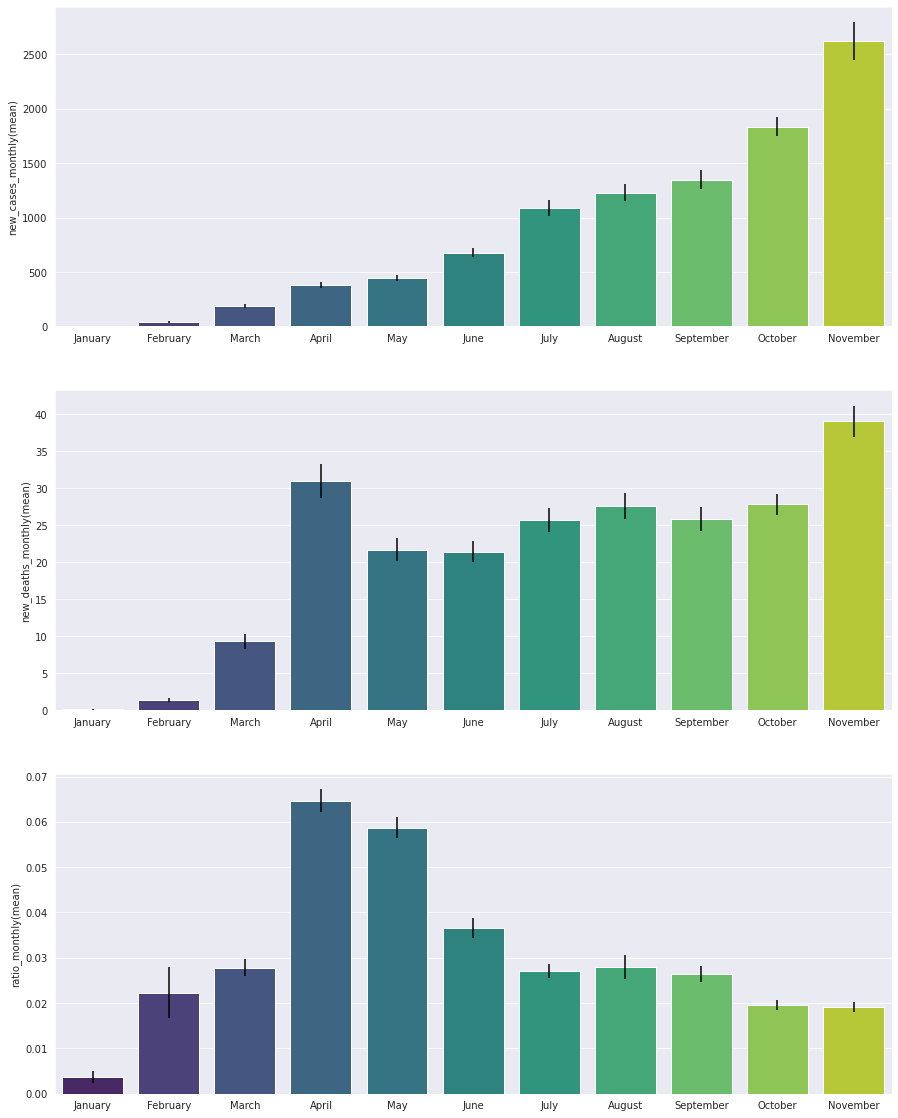

In [15]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(15,20))
for i in range(3):
    sem_error = [x[i] for x in error]
    plt.subplot(3,1,i+1)
    if i==0:
        g = sns.barplot(data=new_df, x=new_df.index.tolist(),
                        y=new_df.new_cases_monthly.tolist(), palette="viridis", yerr = sem_error)
        g.set(ylabel='new_cases_monthly(mean)')
    elif i==1:
        g = sns.barplot(data=new_df, x=new_df.index.tolist(),
                        y=new_df.new_deaths_monthly.tolist(), palette="viridis", yerr = sem_error)
        g.set(ylabel='new_deaths_monthly(mean)')
    else:
        g = sns.barplot(data=new_df, x=new_df.index.tolist(),
                        y=new_df.ratio_monthly.tolist(), palette="viridis", yerr = sem_error)
        g.set(ylabel='ratio_monthly(mean)')

In [202]:
from scipy import stats
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
cases_monthly = []
deaths_monthly = []
ratio_monthly = []
np.seterr(divide='ignore')
error = []

#fields = ['date']
#data_continent = pd.DataFrame(index = df.date )
for i in range(1,12):
    
    for j in range(len(continents)):
        data = df.loc[df.month == i]
        data = data.loc[data.continent == continents[j]]
        
            
        #data2 = df.loc[df.location == 'Italy']
        #data2 = data2.loc[df.month == i]
        #data = data.append(data2)
        #data = data.sort_values(by = ['date', 'iso_code'])
        #print(data)
        
        cases_today = data.new_cases.mean()
        deaths_today = data.new_deaths.mean()    
        ratio_today = data.new_deaths.values/data.new_cases.values

        cases_monthly.append(cases_today)
        deaths_monthly.append(deaths_today)
        ratio_monthly.append((np.nanmean(ratio_today[np.isfinite(ratio_today)])))


        error.append([data.new_cases.sem(),
                  data.new_deaths.sem(),
                  stats.sem(ratio_today, nan_policy='omit')])


np.set_printoptions(suppress=True)


<ipython-input-202-1897a3a6966e>:26: RuntimeWarning: invalid value encountered in true_divide
  ratio_today = data.new_deaths.values/data.new_cases.values
<ipython-input-202-1897a3a6966e>:30: RuntimeWarning: Mean of empty slice
  ratio_monthly.append((np.nanmean(ratio_today[np.isfinite(ratio_today)])))


In [203]:
from datetime import datetime
new_df = pd.DataFrame({'new_cases_monthly':cases_monthly, 'new_deaths_monthly':deaths_monthly, 'ratio_monthly':ratio_monthly})


#months=['January','February','March','April','May','June','Jule','August','September','October','November']
new_df['continent'] = continents*11
#new_df['months'] = months*6
#new2 = new_df.loc[new_df.index=='Europe']

#new_df = new_df.loc[new_df.index]
#new_df = new_df.drop(new_df.index[55:])
#new_df = new_df.drop_duplicates(keep=['last'] and last occurance)
new_df.to_csv(r'/home/left/Desktop/test.csv')

In [204]:
tt=[]
for x in error:
    tt.append(error[0])

[[0.0, 0.0, masked],
 [4.228384706323314, 0.08802217845106808, 0.0017161938389198986],
 [0.006839352409025232, 0.0, 0.0],
 [0.032413407760492986, 0.0, 0.0],
 [0.06129588886188274, 0.0, 0.0],
 [0.0, 0.0, masked],
 [0.01967577248818813, 0.0, 0.0],
 [23.756585812060504, 0.6658340580944809, 0.008937599354604229],
 [0.49696039445474427, 0.012010361351402989, 0.004306767556997311],
 [0.24067551068270798, 0.0, 0.0],
 [0.09956934198015477, 0.0, 0.0],
 [0.017241379310344824, 0.0, masked],
 [0.7315108213488936, 0.03344463808877734, 0.0059298949517238315],
 [9.34420904230672, 0.5665074242882862, 0.003209730644687857],
 [30.446316516740993, 2.820313721473403, 0.002725920665217761],
 [100.54459908207974, 2.2076122145352874, 0.00735366642604038],
 [10.705759734651714, 0.05222244331146395, 0.015819876978427065],
 [5.62319004700749, 0.2102468893939856, 0.008366232360281466],
 [1.1740680300046884, 0.07931199857045892, 0.0050858827629250355],
 [17.492089670662708, 1.148728088801745, 0.003996389452372647

In [206]:
error[0]

[0.0, 0.0, masked]

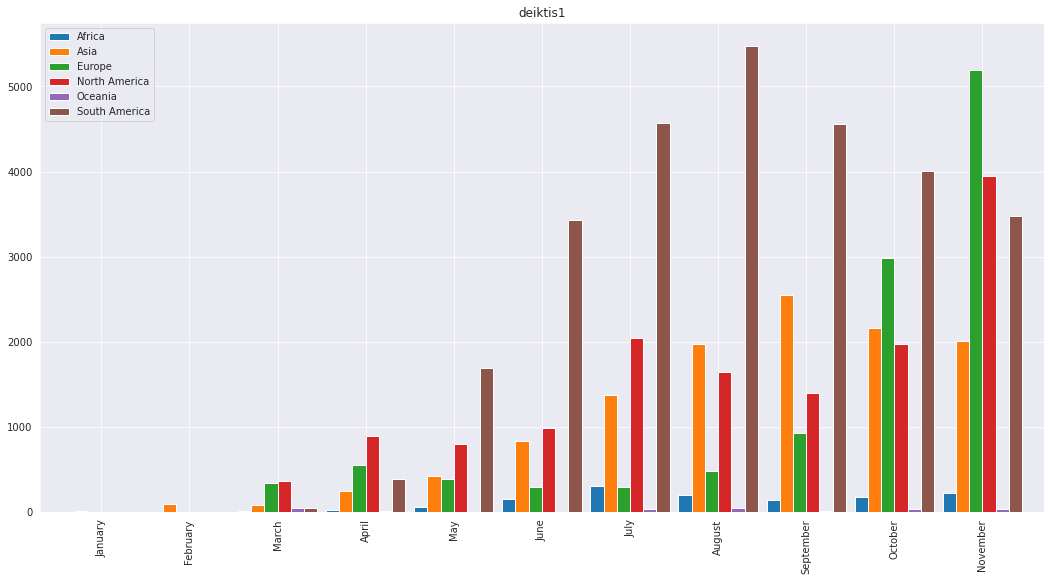

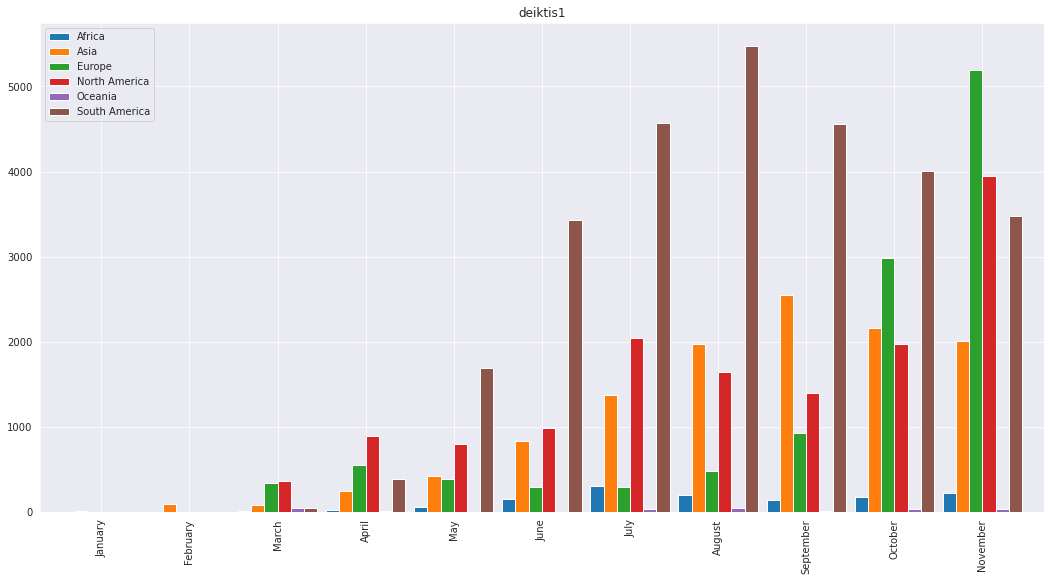

In [209]:
for i in range(2):
    final = pd.DataFrame({
        "Africa":new_df.loc[new_df.continent=='Africa'].new_cases_monthly.values,
        "Asia":new_df.loc[new_df.continent=='Asia'].new_cases_monthly.values,
        "Europe":new_df.loc[new_df.continent=='Europe'].new_cases_monthly.values,
        "North America":new_df.loc[new_df.continent=='North America'].new_cases_monthly.values,
        "Oceania":new_df.loc[new_df.continent=='Oceania'].new_cases_monthly.values,
        "South America":new_df.loc[new_df.continent=='South America'].new_cases_monthly.values},
        index=['January','February','March','April','May','June','July','August','September','October','November'])
    #fig = plt.figure(figsize=(15,20))
    #plt.subplot(2,1,1)
    final.plot(figsize=(18,9),kind='bar',width=.9)
    plt.title("deiktis1")
    plt.xlabel(None)
    plt.ylabel(None)
    #sns.barplot(x= final.index, y= 'new_cases_monthly', data= final,palette='viridis')

In [163]:
new2 = new_df.loc[new_df.continent=='Europe']
new2.index = new2.index//6+1
months = np.array([])

for x in new2.index:
    datetime_object = datetime.strptime(str(x), "%m")
    full_month_name = datetime_object.strftime("%B")
    months = np.append(months,full_month_name)
    
new2 = new2.set_index(months)
#new2.index.name = 'month'
new2 = new2[['continent','new_cases_monthly','new_deaths_monthly','ratio_monthly']]


In [162]:
new3 = new_df.loc[new_df.continent=='Asia']
new3.index = new3.index//6+1
months = np.array([])

for x in new3.index:
    datetime_object = datetime.strptime(str(x), "%m")
    full_month_name = datetime_object.strftime("%B")
    months = np.append(months,full_month_name)
    
new3 = new3.set_index(months)
#new2.index.name = 'month'
new3 = new3[['continent','new_cases_monthly','new_deaths_monthly','ratio_monthly']]


In [73]:
new_df.to_csv(r'/home/left/Desktop/lastocean.csv')

Text(0, 0.5, '')

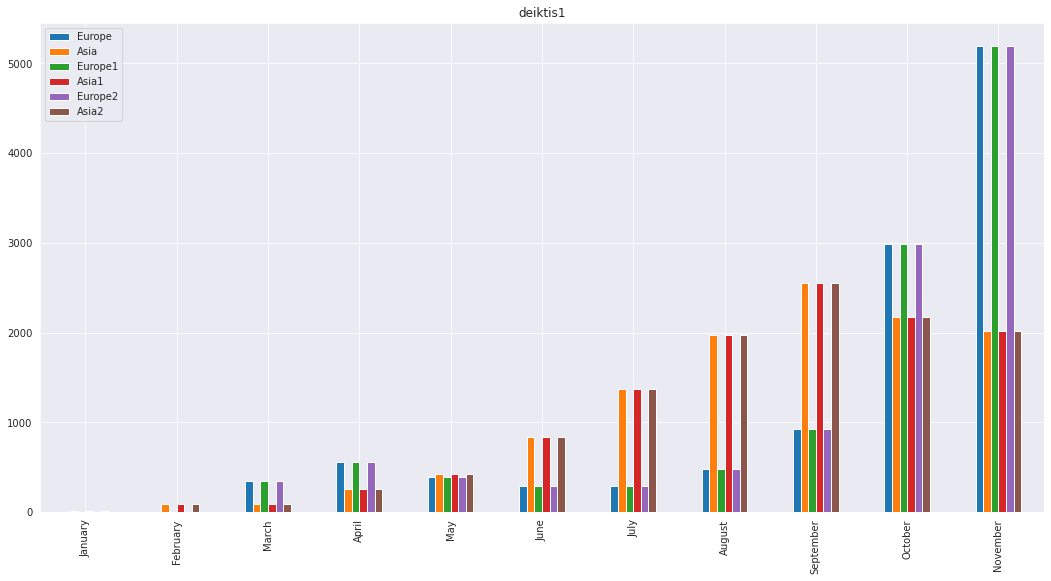

In [169]:
final = pd.DataFrame({
    "Europe":new_df.loc[new_df.continent=='Europe'].new_cases_monthly.values,"Asia":new3.new_cases_monthly,
    "Europe1":new2.new_cases_monthly,"Asia1":new3.new_cases_monthly,
    "Europe2":new2.new_cases_monthly,"Asia2":new3.new_cases_monthly},
    index=['January','February','March','April','May','June','July','August','September','October','November'])
#fig = plt.figure(figsize=(15,20))
#plt.subplot(2,1,1)
final.plot(figsize=(18,9),kind='bar')


plt.title("deiktis1")
plt.xlabel(None)
plt.ylabel(None)
#sns.barplot(x= final.index, y= 'new_cases_monthly', data= final,palette='viridis')